

# СӨЖ 15
# Сверткалық Нейрондық Желілер (CNN) және CIFAR-10

**Мақсаты:** Сверткалық нейрондық желілердің (CNN) жұмыс істеу принципін түсіну және CIFAR-10 деректер жиынтығындағы түрлі-түсті суреттерді классификациялау үшін модель құру.

**Сіздің тапсырмаңыз:** Төмендегі код ұяшықтарында `# TODO` деп белгіленген жерлерді дұрыс кодпен немесе мәнмен толтыру.




### 1. Қысқаша теория

Сверткалық нейрондық желілер (CNN) – бұл суреттерді өңдеуге арналған ең тиімді архитектура. Ол негізгі үш бөліктен тұрады:

1. **Convolutional Layer (Сверткалық қабат):** Суреттің үстінен кішкентай "сүзгілер" (filters) жүргізу арқылы маңызды белгілерді (сызықтар, бұрыштар, фактуралар) бөліп алады.
* *Функция:* `layers.Conv2D`


2. **Pooling Layer (Пулинг қабаты):** Суреттің өлшемін кішірейтеді, есептеуді жеңілдетеді және маңызды ақпаратты қалдырады. Ең көп тарағаны – Max Pooling (аймақтағы ең үлкен мәнді алу).
* *Функция:* `layers.MaxPooling2D`


3. **Fully Connected Layer (Толық байланысқан қабат):** Соңында табылған белгілерді біріктіріп, суреттің қай класқа жататынын анықтайды.
* *Функция:* `layers.Dense`



Алдымен қажетті кітапханаларды қосайық.

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Нұсқаны тексеру
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0



### 2. Деректерді жүктеу (CIFAR-10)

Біз **CIFAR-10** датасетін қолданамыз. Онда 10 түрлі класқа жататын 60,000 түрлі-түсті сурет (32x32 пиксель) бар.
Кластар: *'ұшақ', 'автокөлік', 'құс', 'мысық', 'бұғы', 'ит', 'бақа', 'жылқы', 'кеме', 'жүк көлігі'.*


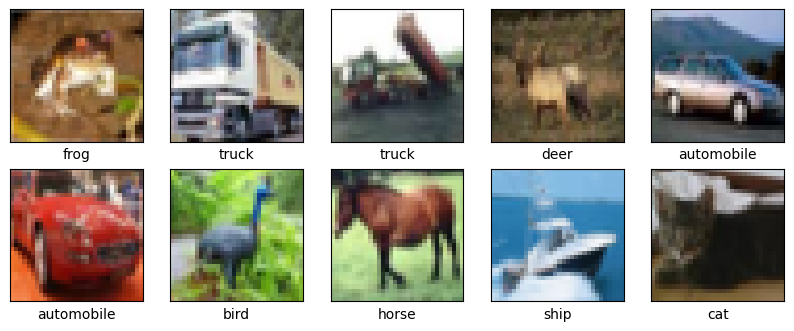

In [6]:
# Деректерді жүктеу
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Пиксель мәндерін 0 мен 1 аралығына келтіру (Нормализация)
# TODO: Студент сурет пиксельдерін нормализациялауы керек (255.0-ге бөлу)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Класс атаулары
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Деректердің дұрыс жүктелгенін тексеру (алғашқы 10 суретті шығару)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # CIFAR labels массивтер массиві болып табылады, сондықтан қосымша индекс керек
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


### 3. CNN Архитектурасын құру (Негізгі тапсырма)

Бұл бөлімде сіз нейрондық желінің "қаңқасын" жинайсыз.
Сызба мынадай болуы керек:

1. **Conv2D:** 32 фильтр, (3, 3) өлшем, 'relu' активациясы, кіріс өлшемі (32, 32, 3).
2. **MaxPooling2D:** (2, 2) өлшемі.
3. **Conv2D:** 64 фильтр, (3, 3) өлшем, 'relu' активациясы.
4. **MaxPooling2D:** (2, 2) өлшемі.
5. **Conv2D:** 64 фильтр, (3, 3) өлшем, 'relu' активациясы.
6. **Flatten:** Векторға айналдыру.
7. **Dense:** 64 нейрон, 'relu' активациясы.
8. **Dense (Шығыс):** 10 нейрон (кластар саны).

**Тапсырма:** Төмендегі кодта қалдырылған `# TODO` орындарын толтырыңыз.


In [9]:
model = models.Sequential()

# --- Feature Extraction (Белгілерді алу) бөлігі ---

# 1-қабат: Конволюция
# TODO: filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3) параметрлерін қосыңыз
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

# 2-қабат: Пулинг
# TODO: pool_size=(2, 2) параметрін қосыңыз
model.add(layers.MaxPooling2D(2, 2))

# 3-қабат: Конволюция (фильтр санын 64-ке көбейтіңіз)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 4-қабат: Пулинг
model.add(layers.MaxPooling2D((2, 2)))

# 5-қабат: Конволюция (64 фильтр)
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification (Жіктеу) бөлігі

# 6-қабат: Flatten (Жалпақтау - 3D тензорды 1D векторға айналдыру)
model.add(layers.Flatten())

# 7-қабат: Dense (Толық байланысқан қабат)
# TODO: 64 нейрон және 'relu' активациясын қолданыңыз
model.add(layers.Dense(62, activation='relu'))

# 8-қабат: Шығыс қабаты
# TODO: CIFAR-10 датасетінде қанша класс бар? Соған сәйкес нейрон санын жазыңыз.
model.add(layers.Dense(10, activation='softmax'))

# Модель құрылымын тексеру
model.summary()

c:\Users\jekim\OneDrive\Desktop\Notes-on-ML-Courses\tf_venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 62)             │        63,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,500 (470.70 KB)

 Trainable params: 120,500 (470.70 KB)

 Non-trainable params: 0 (0.00 B)


### 4. Модельді компиляциялау және оқыту

Модель дайын, енді оны оқыту ережелерін бекітуіміз керек.

* **Optimizer:** `adam` (ең танымал оптимизатор).
* **Loss Function:** `SparseCategoricalCrossentropy` (кластар сандармен берілген кезде қолданылады).
* **Metrics:** `accuracy` (дәлдік).

**Тапсырма:** Компиляция және оқыту параметрлерін толтырыңыз.


In [10]:
# Модельді компиляциялау
# TODO: optimizer='adam' деп көрсетіңіз
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Модельді оқыту (Training)
# TODO: epochs=10 (оқыту циклінің саны) деп көрсетіңіз
# validation_data ретінде (test_images, test_labels) қолданыңыз
history = model.fit(train_images, train_labels,
                    epochs= 10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


c:\Users\jekim\OneDrive\Desktop\Notes-on-ML-Courses\tf_venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4464 - loss: 1.5197 - val_accuracy: 0.5514 - val_loss: 1.2284
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5899 - loss: 1.1633 - val_accuracy: 0.6256 - val_loss: 1.0699
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6396 - loss: 1.0224 - val_accuracy: 0.6415 - val_loss: 1.0238
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6744 - loss: 0.9251 - val_accuracy: 0.6756 - val_loss: 0.9270
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6978 - loss: 0.8580 - val_accuracy: 0.6877 - val_loss: 0.8962
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7189 - loss: 0.7986 - val_accuracy: 0.6685 - val_loss: 0.9609
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7339 - loss: 0.7522 - val_accuracy: 0.6994 - val_loss: 0.8774
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7506 - loss: 0.7070 - val



### 5. Нәтижелерді бағалау

Модельдің оқу барысында қателіктер қалай азайғанын және дәлдік қалай өскенін график арқылы көрейік.


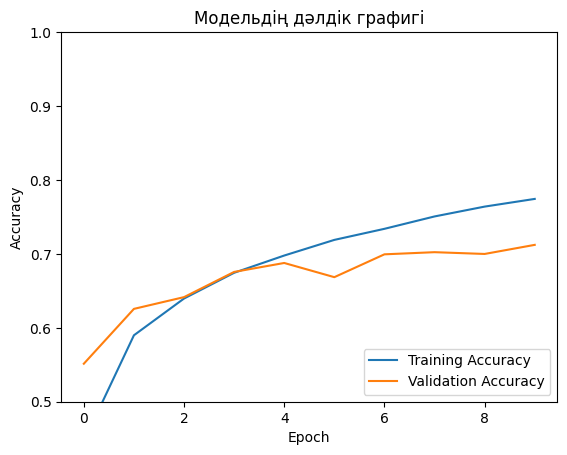

313/313 - 1s - 3ms/step - accuracy: 0.7122 - loss: 0.8550

Модельдің тесттегі дәлдігі: 71.22%


In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Модельдің дәлдік графигі')
plt.show()

# Тест жиынтығындағы соңғы дәлдікті есептеу
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nМодельдің тесттегі дәлдігі: {test_acc*100:.2f}%")


### 6. Модельді тексеру (Prediction)

Енді моделіміз нақты суретті қалай танитынын тексерейік. Біз тест жиынтығынан кездейсоқ бір суретті алып, модельге ұсынамыз.


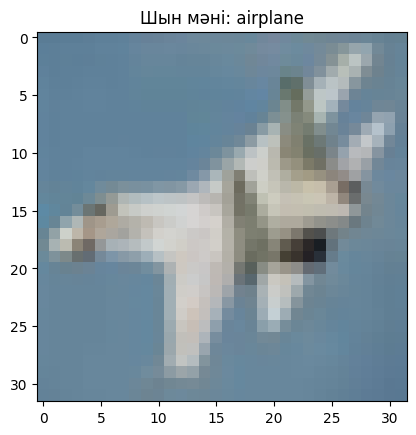

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Бұл сурет 14.84% ықтималдықпен 'deer' деп танылды.


In [21]:
# Тест жиынтығынан 10-шы суретті алайық
n = 10

plt.imshow(test_images[n])
plt.title(f"Шын мәні: {class_names[test_labels[n][0]]}")
plt.show()

# Болжам жасау
# Суретті (32,32,3) пішінінен (1, 32, 32, 3) пішініне ауыстыру керек (batch өлшемі)
img_array = np.expand_dims(test_images[n], axis=0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(f"Бұл сурет {100 * np.max(score):.2f}% ықтималдықпен '{class_names[np.argmax(score)]}' деп танылды.")



### Қорытынды сұрақтар

Зертханалық жұмысты қорғау үшін келесі сұрақтарға жауап дайындаңыз:

1. Неліктен біз `Conv2D` қабатын қолданамыз, жай ғана `Dense` қабаттары жеткіліксіз бе?
2. `MaxPooling` қабаты суреттің өлшемін қалай өзгертеді және оның пайдасы неде?
3. Егер `epochs` санын 10-нан 50-ге дейін көбейтсек, нәтиже қалай өзгеруі мүмкін? (Overfitting туралы ойланыңыз).

# Нәтиже дәлдік 90+

In [22]:
model_2 = models.Sequential()

model_2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D(2, 2))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Classification (Жіктеу) бөлігі
model_2.add(layers.Flatten())

# 7-қабат: Dense (Толық байланысқан қабат)
model_2.add(layers.Dense(62, activation='relu'))

# 8-қабат: Шығыс қабаты
model_2.add(layers.Dense(10, activation='softmax'))

# Модель құрылымын тексеру
model_2.summary()

c:\Users\jekim\OneDrive\Desktop\Notes-on-ML-Courses\tf_venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        63,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,500 (470.70 KB)

 Trainable params: 120,500 (470.70 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Модельді оқыту (Training)
history_2 = model_2.fit(train_images, train_labels,
                    epochs= 50,
                    validation_data=(test_images, test_labels))

Epoch 1/50


c:\Users\jekim\OneDrive\Desktop\Notes-on-ML-Courses\tf_venv\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6772 - loss: 0.9143 - val_accuracy: 0.6791 - val_loss: 0.9250
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7027 - loss: 0.8433 - val_accuracy: 0.6906 - val_loss: 0.8962
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7264 - loss: 0.7786 - val_accuracy: 0.6858 - val_loss: 0.9038
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7453 - loss: 0.7237 - val_accuracy: 0.6980 - val_loss: 0.8824
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7599 - loss: 0.6832 - val_accuracy: 0.7080 - val_loss: 0.8565
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7740 - loss: 0.6406 - val_accuracy: 0.7095 - val_loss: 0.8623
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7879 - loss: 0.6034 - val_accuracy: 0.7116 - val_loss: 0.8704
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7993 - loss: 0.5692 - val_

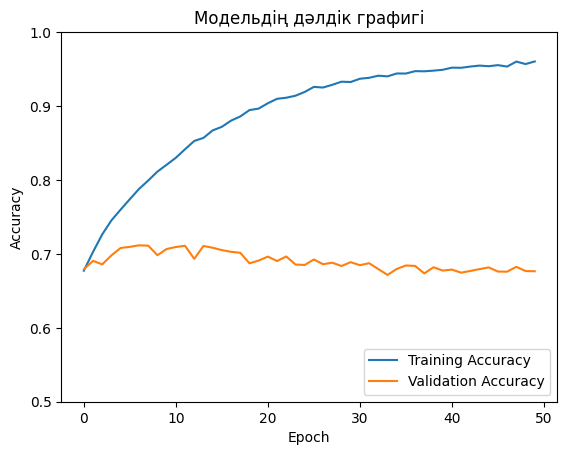

313/313 - 1s - 4ms/step - accuracy: 0.6765 - loss: 2.6240

Модельдің тесттегі дәлдігі: 67.65%


In [25]:
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Модельдің дәлдік графигі')
plt.show()

test_loss, test_acc = model_2.evaluate(test_images,  test_labels, verbose=2)
print(f"\nМодельдің тесттегі дәлдігі: {test_acc*100:.2f}%")

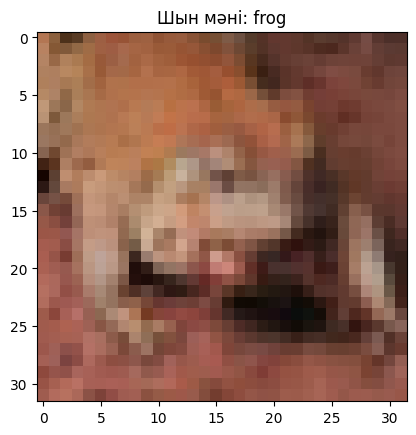

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Бұл сурет 23.20% ықтималдықпен 'frog' деп танылды.


In [31]:
n = 5

plt.imshow(test_images[n])
plt.title(f"Шын мәні: {class_names[test_labels[n][0]]}")
plt.show()

# Болжам жасау
# Суретті (32,32,3) пішінінен (1, 32, 32, 3) пішініне ауыстыру керек (batch өлшемі)
img_array = np.expand_dims(test_images[n], axis=0)

predictions_2 = model_2.predict(img_array)
score_2 = tf.nn.softmax(predictions_2[0])

print(f"Бұл сурет {100 * np.max(score_2):.2f}% ықтималдықпен '{class_names[np.argmax(score_2)]}' деп танылды.")

# 3 Model


In [33]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)))
model_3.add(layers.Conv2D(98, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(62, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

model_3.summary()



model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Модельді оқыту (Training)
history_2 = model_3.fit(train_images, train_labels,
                    epochs= 15,
                    batch_size = 12,
                    validation_data=(test_images, test_labels))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 98)     │        56,546 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 98)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 64)     │        56,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 62)             │       142,910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,390 (1009.34 KB)

 Trainable params: 258,390 (1009.34 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 45s 31ms/step - accuracy: 0.4708 - loss: 1.4625 - val_accuracy: 0.5962 - val_loss: 1.1510
Epoch 2/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - accuracy: 0.6327 - loss: 1.0492 - val_accuracy: 0.6253 - val_loss: 1.0568
Epoch 3/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 47s 34ms/step - accuracy: 0.6857 - loss: 0.9011 - val_accuracy: 0.6860 - val_loss: 0.9020
Epoch 4/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 49s 35ms/step - accuracy: 0.7166 - loss: 0.8087 - val_accuracy: 0.6919 - val_loss: 0.8930
Epoch 5/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.7423 - loss: 0.7410 - val_accuracy: 0.7198 - val_loss: 0.8299
Epoch 6/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.7610 - loss: 0.6862 - val_accuracy: 0.7264 - val_loss: 0.8117
Epoch 7/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.7773 - loss: 0.6388 - val_accuracy: 0.7081 - val_loss: 0.8553
Epoch 8/15
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.7927 -

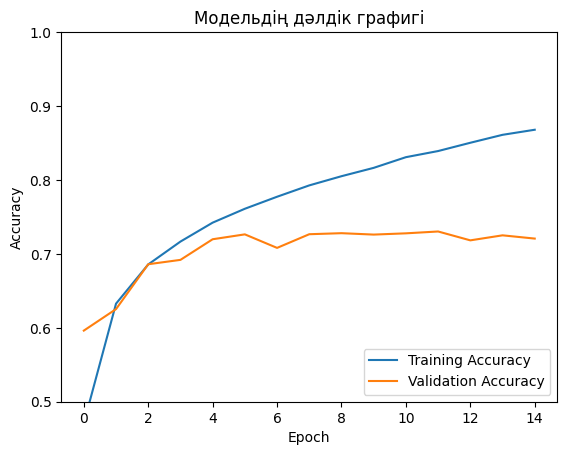

313/313 - 3s - 10ms/step - accuracy: 0.7207 - loss: 0.9711

Модельдің тесттегі дәлдігі: 72.07%


In [34]:
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Модельдің дәлдік графигі')
plt.show()

test_loss_3, test_acc_3 = model_3.evaluate(test_images,  test_labels, verbose=2)
print(f"\nМодельдің тесттегі дәлдігі: {test_acc_3*100:.2f}%")

# Model 4

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216,650 (4.64 MB)

 Trainable params: 1,216,650 (4.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 62s 18ms/step - accuracy: 0.3577 - loss: 1.7213 - val_accuracy: 0.5053 - val_loss: 1.3674
Epoch 2/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 69s 21ms/step - accuracy: 0.5669 - loss: 1.2425 - val_accuracy: 0.6129 - val_loss: 1.1076
Epoch 3/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 69s 21ms/step - accuracy: 0.6456 - loss: 1.0376 - val_accuracy: 0.6711 - val_loss: 0.9715
Epoch 4/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - accuracy: 0.6947 - loss: 0.9086 - val_accuracy: 0.6908 - val_loss: 0.8921
Epoch 5/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 67s 20ms/step - accuracy: 0.7260 - loss: 0.8202 - val_accuracy: 0.6942 - val_loss: 0.8967
Epoch 6/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 72s 22ms/step - accuracy: 0.7521 - loss: 0.7447 - val_accuracy: 0.7253 - val_loss: 0.8326
Epoch 7/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 66s 20ms/step - accuracy: 0.7756 - loss: 0.6730 - val_accuracy: 0.7015 - val_loss: 0.9463
Epoch 8/15
3334/3334 ━━━━━━━━━━━━━━━━━━━━ 60s 18ms/step - accuracy: 0.7964 -

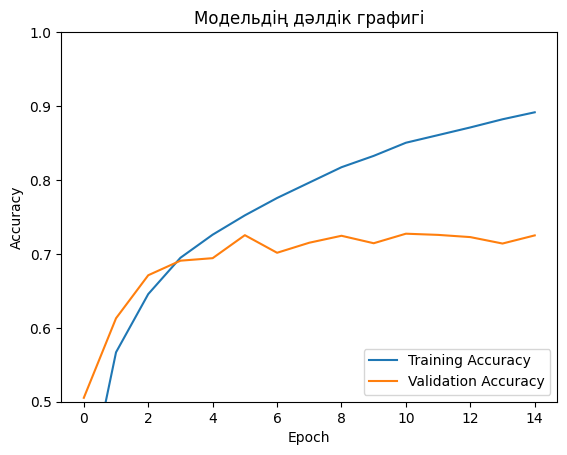

313/313 - 3s - 11ms/step - accuracy: 0.7250 - loss: 1.3067

Модельдің тесттегі дәлдігі: 72.50%


In [36]:
model_4 = models.Sequential()

model_4.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
# model_4.add(layers.Dropout(0.2))

model_4.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_4.add(layers.Conv2D(256, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))
# model_4.add(layers.Dropout(0.3))

model_4.add(layers.Flatten())
model_4.add(layers.Dense(128, activation='relu'))
model_4.add(layers.Dense(64, activation='relu'))

model_4.add(layers.Dropout(0.5))
model_4.add(layers.Dense(10, activation='softmax'))

model_4.summary()




model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Модельді оқыту (Training)
history_4 = model_4.fit(train_images, train_labels,
                    epochs= 15,
                    batch_size = 15,
                    validation_data=(test_images, test_labels))



plt.plot(history_4.history['accuracy'], label='Training Accuracy')
plt.plot(history_4.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Модельдің дәлдік графигі')
plt.show()

test_loss_4, test_acc_4 = model_4.evaluate(test_images,  test_labels, verbose=2)
print(f"\nМодельдің тесттегі дәлдігі: {test_acc_4*100:.2f}%")